## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# import systemcheck

## loading data

In [3]:
data = pd.read_csv("heart.csv")
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

## data analysis

In [4]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

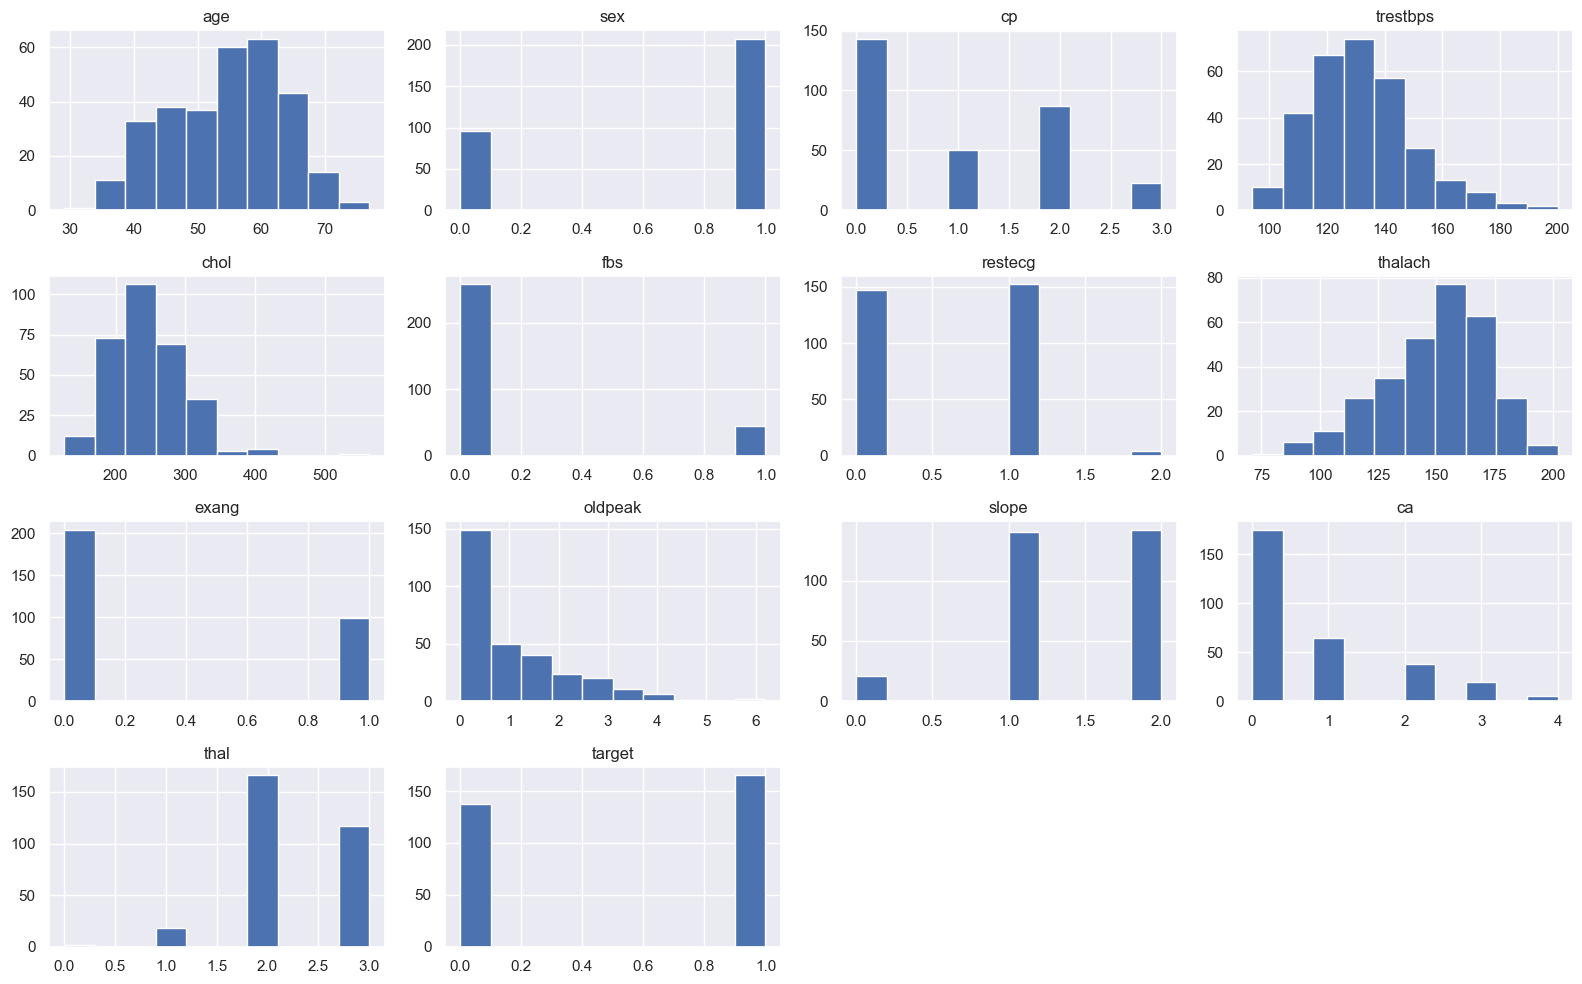

In [4]:
sns.set()
data.hist(figsize = (16,10))
plt.tight_layout()
plt.show()

In [6]:
sns.countplot(x = "target", data = data)
plt.show()

In [7]:
#checking null values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


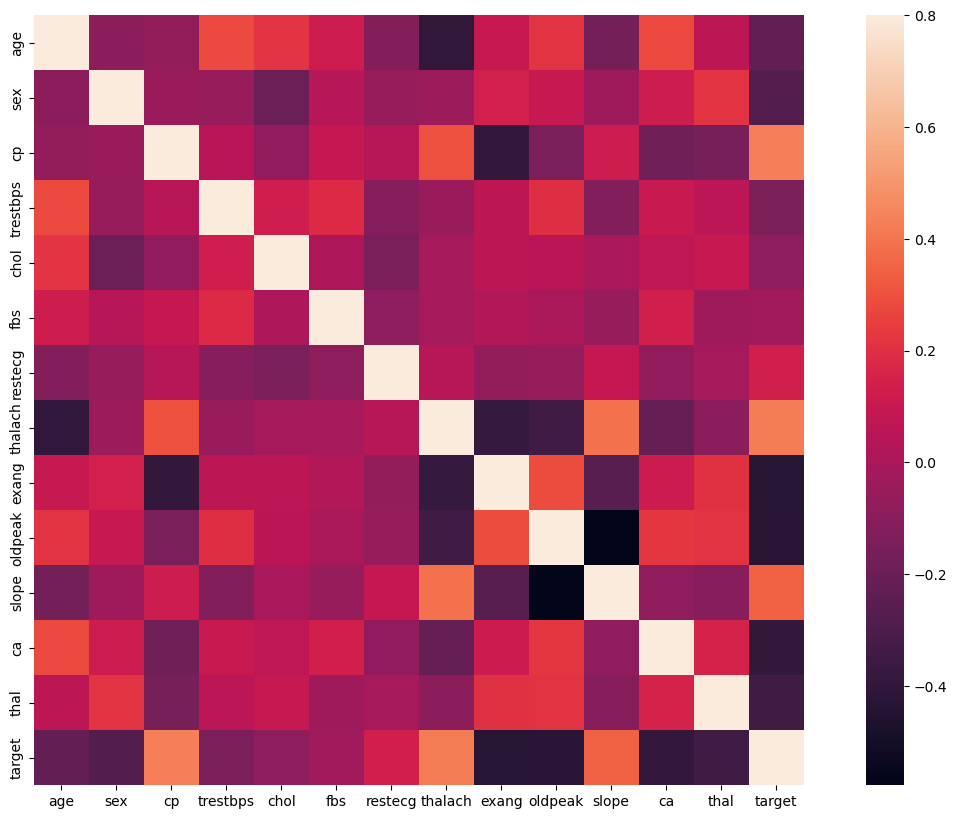

In [9]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(), square = True, vmax = 0.8)
plt.show()

## data preprocessing

In [11]:
#spliting in training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns = ["target"]), data["target"])

In [12]:
# loading the algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
clf = [DecisionTreeClassifier(), RandomForestClassifier(n_estimators = 10), SVC(gamma = "scale"), KNeighborsClassifier(), MultinomialNB()]

## training the algortihms

In [13]:
for i in clf:
    i.fit(x_train, y_train)

## Evaluation

In [21]:
from sklearn.metrics import accuracy_score, classification_report
algo = ["Decision Tree", "Random Forest", "Support Vector", "K Nearest Neighbors", "Naive Bayes"]
prediction = []
a = 0
for i in clf:
    predict = i.predict(x_test)
    print(algo[a])
    a +=1
    print("Accuracy", accuracy_score(y_test, predict)*100, "%")
    print("Classification Report")
    print(classification_report(y_test, predict))
    print("-----------------------------------------------------")

Decision Tree
Accuracy 76.31578947368422 %
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        41
           1       0.73      0.77      0.75        35

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76

-----------------------------------------------------
Random Forest
Accuracy 80.26315789473685 %
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.75      0.86      0.80        35

    accuracy                           0.80        76
   macro avg       0.81      0.81      0.80        76
weighted avg       0.81      0.80      0.80        76

-----------------------------------------------------
Support Vector
Accuracy 63.1578947368421 %
Classification Report
              precision    recall  f1-score

## Neural network

### preprocessing for neural network

In [12]:
x = data.drop(columns = ["target"])
y = data["target"]
x.shape

(303, 13)

In [16]:
x = x.values.reshape(-1,x.shape[1],1)

NameError: name 'x' is not defined

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

NameError: name 'x' is not defined

In [4]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=x.shape[1:]),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

ModuleNotFoundError: No module named 'tensorflow'

In [14]:
history = model.fit(x_train, y_train, epochs = 150, validation_data = (x_test, y_test))

NameError: name 'model' is not defined

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)